In [148]:
import pandas as pd

In [149]:
base = pd.read_csv('titanic_train.csv')

In [150]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [151]:
#Eliminando a coluna 'Cabin', pois ela apresenta muitos valores vazios
base = base.drop('Cabin',axis=1) #axis representa o eixo, ou seja, axis=1 -> eliminar a coluna
                                                        #   axis=0 -> eliminar uma linha

In [152]:
# Eliminando valores vazios
base = base.dropna()

In [153]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [154]:
base['Sex']= base['Sex'].str.lower()

base['Sex'].info()

<class 'pandas.core.series.Series'>
Index: 712 entries, 0 to 890
Series name: Sex
Non-Null Count  Dtype 
--------------  ----- 
712 non-null    object
dtypes: object(1)
memory usage: 11.1+ KB


In [155]:
#Antes, mudar 'male' e 'female' na coluna 'Sex' para '0' e '1' (faz sentido, pois percebemos na analise que essa coluna tinha bastante impacto em relação a sobrevivencia da pessoa)

base['Sex'] = base['Sex'].map({'male': 0, 'female': 1})


In [156]:
# Faz sentido tbm tirar as colunas com valores que não são valores numericos
# Nesse caso, os valores com dtype 'object'


# Selecionando as colunas com o tipo 'object'
colunas_eliminadas= base.dtypes[base.dtypes.values == 'object'].index

In [157]:
#Eliminando colunas
base = base.drop(colunas_eliminadas, axis=1)

In [158]:
#Verificando
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    int64  
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 50.1 KB


## Vamos utilizar a biblioteca "Scikit-Learn"

***Apresenta ferramentas simples e eficientes para análise preditiva de dados***

In [159]:
#Definindo o X e Y para o treino

# X serão as variáveis utilizadas para fazer a previsão
X = base.drop('Survived', axis=1)

#Y será a coluna "Survived", pois é o valor que queremos prever
y = base.Survived

## Utilizando KNN

In [160]:
from sklearn.neighbors import KNeighborsClassifier

In [161]:
#Criando o CLASSIFICADOR (que será o "neigh")
neigh = KNeighborsClassifier(n_neighbors=3) 

#KNN tem um parâmetro, ele vai fazer --> pegar os valores mais próximos dele, e vai ser da mesma classe que a maioria dos valores
                                        # ou seja, se ta num ponto que tem  0, 0 e 1 (3 valores) próximos ao ponto observado
                                        # o KNN vai transformar o ponto observado em 0, pois a maioria dos valores próximos a ele
                                        # são 0

In [162]:
#Fit do modelo
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [163]:
#Avaliando o modelo
neigh.score(X, y)

0.7921348314606742

## Utilizando árvore de decisão

In [164]:
from sklearn import tree

In [165]:
#Criando classificador
clfTree = tree.DecisionTreeClassifier()

In [166]:
#Fit do modelo
clfTree = clfTree.fit(X, y)

In [167]:
#Avaliando o modelo
clfTree.score(X,y)

# "1.0" == 100% de acerto, mas será que o modelo realmente sempre acerta, ou será que ele só decorou os dados ?

1.0

## Utilizando Regressão Logistíca

In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
#Criando classificador e fazendo fit
clfLog = LogisticRegression(random_state=0, max_iter=1000).fit(X, y)

In [170]:
#Avaliando o modelo
clfLog.score(X,y)

0.8075842696629213

## Avaliando modelos de classificação

In [171]:
#Importando e visualizando a base de teste
test_base = pd.read_csv('titanic_test.csv')

In [172]:
#Fazendo os mesmos tartamentos da base de treino (TUDO oq foi feito na base de TREINO, precisa ser feito na base de TESTE)


#Eliminando a coluna 'Cabin', pois ela apresenta muitos valores vazios
test_base = test_base.drop('Cabin',axis=1) #axis representa o eixo, ou seja, axis=1 -> eliminar a coluna
                                                        #   axis=0 -> eliminar uma linha
    
# Eliminando valores vazios
test_base = test_base.dropna()

# Faz sentido tbm tirar as colunas com valores que não são valores numericos
# Nesse caso, os valores com dtype 'object'

#Antes, mudar 'male' e 'female' na coluna 'Sex' para '0' e '1' (faz sentido, pois percebemos na analise que essa coluna tinha bastante impacto em relação a sobrevivencia da pessoa)
test_base['Sex']= test_base['Sex'].str.lower()
test_base['Sex'] = test_base['Sex'].map({'male': 0, 'female': 1})

# Selecionando as colunas com o tipo 'object'
colunas_eliminadas= test_base.dtypes[test_base.dtypes.values == 'object'].index

#Eliminando colunas
test_base = test_base.drop(colunas_eliminadas, axis=1)

In [173]:
#Definindo o X e Y para o TESTE

# X serão as variáveis utilizadas para fazer a previsão
X_test = test_base.drop('Survived', axis=1)

#Y será a coluna "Survived", pois é o valor que queremos prever
y_test = test_base.Survived

In [174]:
#Fazendo a predição com KNN
pred_KNN = neigh.predict(X_test)

In [175]:
#Fazendo a predição com a Árvore de Decisão
pred_Tree = clfTree.predict(X_test)

In [176]:
#Fazendo a predição com Regressão Logística
pred_Log = clfLog.predict(X_test)

## Agora vamos entrar nos Parâmetros de Avaliação do Modelo

### Matriz de Confusão

   ***Matriz que vai correlacionar os valores REAIS com os valores do MODELO***
   
   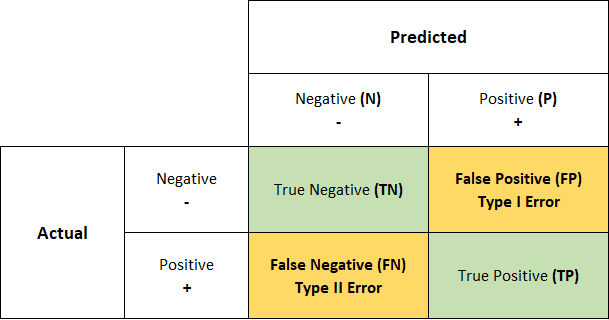

In [178]:
#Importando matriz de confusão
from sklearn.metrics import confusion_matrix

In [179]:
#Verificando a matriz para o KNN
confusion_matrix(y_test, pred_KNN)

array([[ 68, 136],
       [ 35,  92]], dtype=int64)

In [180]:
#Verificando a matriz para a Árvore
confusion_matrix(y_test, pred_Tree)

array([[174,  30],
       [ 25, 102]], dtype=int64)

In [181]:
##Verificando a matriz para a Regressão Logística
confusion_matrix(y_test, pred_Log)

array([[182,  22],
       [  6, 121]], dtype=int64)

## Acurácia

In [182]:
from sklearn.metrics import accuracy_score

In [183]:
#Verificando a acuracia para o KNN
accuracy_score(y_test, pred_KNN)

0.48338368580060426

In [184]:
#Verificando a acuracia para a Árvore
accuracy_score(y_test, pred_Tree)

0.8338368580060423

In [185]:
#Verificando a acuracia para a Regressão Logística
accuracy_score(y_test, pred_Log)

0.9154078549848943

## Precisão

***Relação entre os Falsos Positivos e os Verdadeiros Positivos***

In [186]:
from sklearn.metrics import precision_score

In [187]:
#Verificando a precisao para o KNN
precision_score(y_test, pred_KNN)

0.40350877192982454

In [188]:
#Verificando a precisao para a Árvore
precision_score(y_test, pred_Tree)

0.7727272727272727

In [189]:
#Verificando a precisao para a Regressão Logística
precision_score(y_test, pred_Log)

0.8461538461538461

## Recall

***Relação entre Falsos Negativos e Verdadeiros Positivos***

In [191]:
from sklearn.metrics import recall_score

In [192]:
#Verificando o Recall para o KNN
recall_score(y_test, pred_KNN)

0.7244094488188977

In [193]:
#Verificando o recall para a Árvore
recall_score(y_test, pred_Tree)

0.8031496062992126

In [194]:
#Verificando o recall para a Regressão Logística
recall_score(y_test, pred_Log)

0.952755905511811